#### SMS Spam Collection - Exploratory Data Analysis
This notebook performs exploratory data analysis (EDA) on the SMS Spam Collection dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\sumit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load data
df = pd.read_csv('../data/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

In [4]:
# Basic info
print(f"Dataset shape: {df.shape}")
print("\nLabel distribution:")
print(df['label'].value_counts(normalize=True))

Dataset shape: (5572, 2)

Label distribution:
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


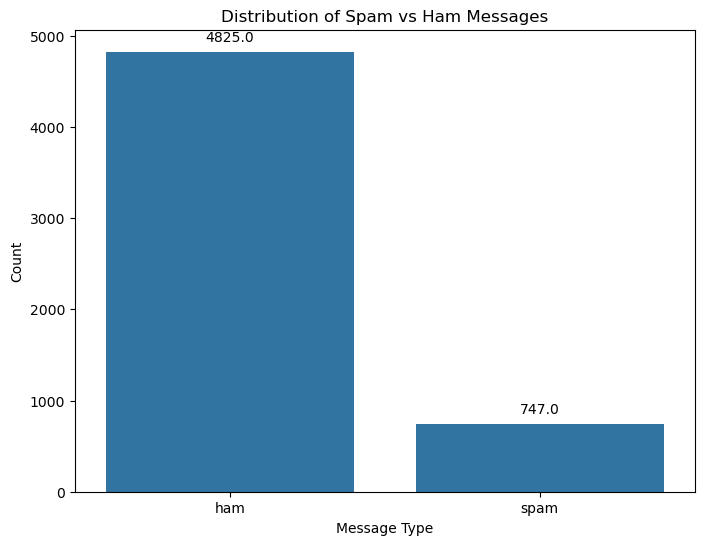

In [5]:
# Class distribution visualization
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('../plots/class_distribution.png', bbox_inches='tight')
plt.show()

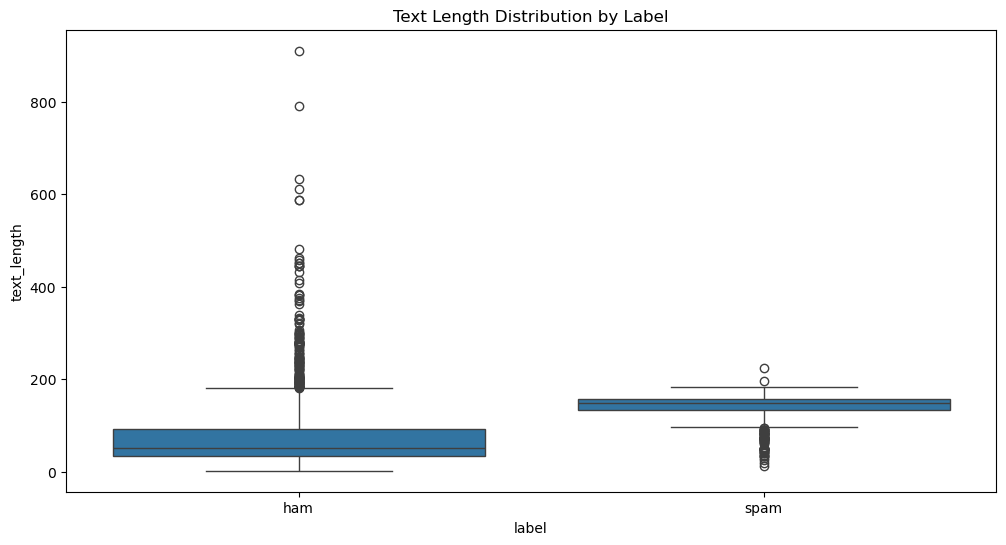

In [6]:
# Text length analysis
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution by Label')
plt.savefig('../plots/text_length_distribution.png', bbox_inches='tight')
plt.show()

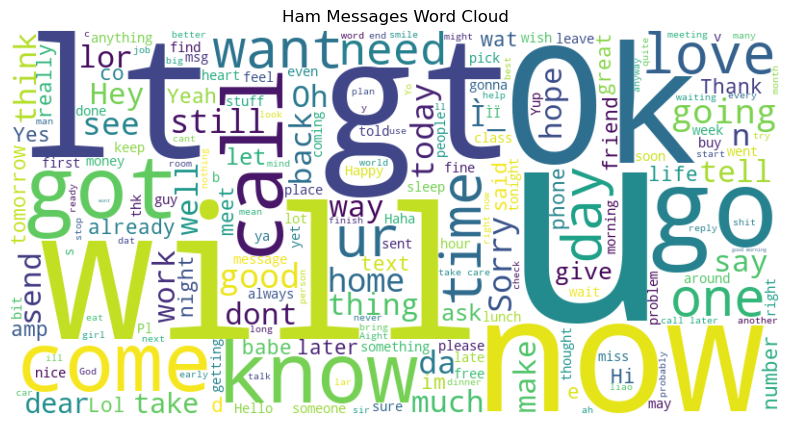

<Figure size 640x480 with 0 Axes>

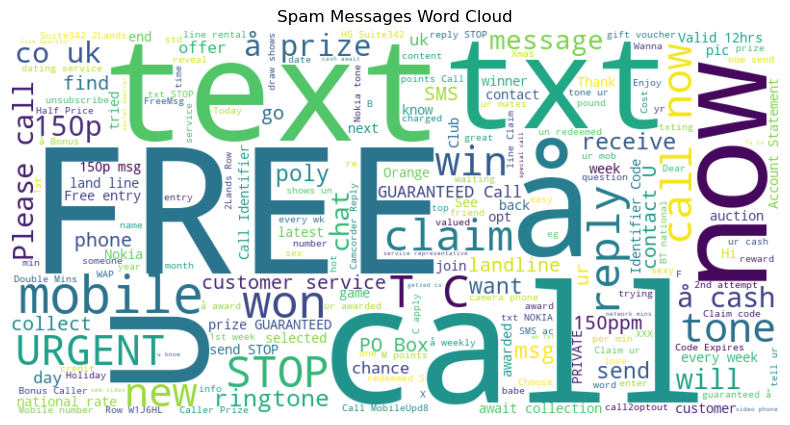

<Figure size 640x480 with 0 Axes>

In [7]:
# Word cloud visualization
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds
ham_text = ' '.join(df[df['label'] == 'ham']['text'])
spam_text = ' '.join(df[df['label'] == 'spam']['text'])

generate_wordcloud(ham_text, 'Ham Messages Word Cloud')
plt.savefig('../plots/ham_word_cloud.png', bbox_inches='tight')

generate_wordcloud(spam_text, 'Spam Messages Word Cloud')
plt.savefig('../plots/spam_word_cloud.png', bbox_inches='tight')

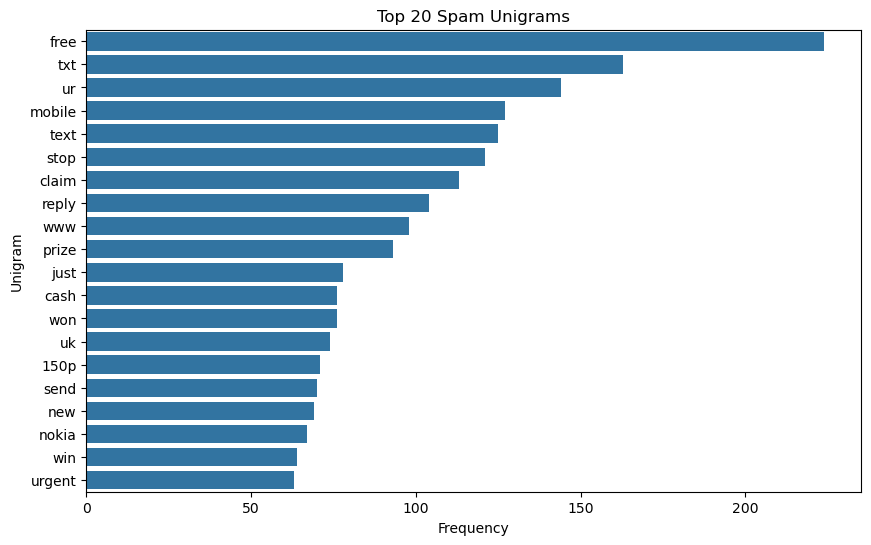

In [8]:
# Top n-grams analysis
def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 20 unigrams
top_unigrams = get_top_ngrams(df[df['label']=='spam']['text'], 20, (1,1))
plt.figure(figsize=(10,6))
sns.barplot(x=[val[1] for val in top_unigrams], y=[val[0] for val in top_unigrams])
plt.title('Top 20 Spam Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.savefig('../plots/top_spam_unigrams.png', bbox_inches='tight')
plt.show()